In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            # sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays            
data = np.array(data)
labels = np.array(labels)

In [2]:
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [3]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
491/491 [==============================] - 110s 191ms/step - loss: 2.0798 - accuracy: 0.5020 - val_loss: 0.3540 - val_accuracy: 0.9259
Epoch 2/15
491/491 [==============================] - 92s 187ms/step - loss: 0.5028 - accuracy: 0.8593 - val_loss: 0.1316 - val_accuracy: 0.9714
Epoch 3/15
491/491 [==============================] - 95s 192ms/step - loss: 0.3022 - accuracy: 0.9170 - val_loss: 0.0679 - val_accuracy: 0.9828
Epoch 4/15
491/491 [==============================] - 96s 196ms/step - loss: 0.2196 - accuracy: 0.9391 - val_loss: 0.0746 - val_accuracy: 0.9793
Epoch 5/15
491/491 [==============================] - 92s 188ms/step - loss: 0.1821 - accuracy: 0.9504 - val_loss: 0.0411 - val_accuracy: 0.9880
Epoch 6/15
491/491 [==============================] - 94s 191ms/step - loss: 0.1716 - accuracy: 0.9543 - val_loss: 0.0555 - val_accuracy: 0.9851
Epoch 7/15
491/491 [==============================] - 83s 169ms/step - loss: 0.1613 - accuracy: 0.9557 - val_loss: 0.0431 - val_a

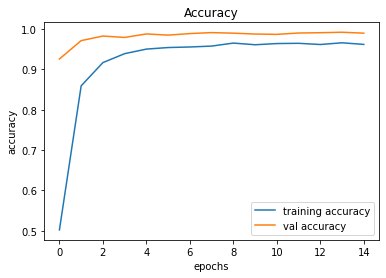

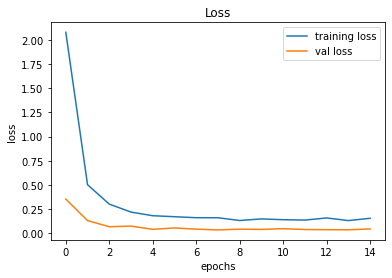

In [5]:
# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [9]:
# Testing accuracy on test dataset
from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    
X_test = np.array(data)

pred = np.argmax(model.predict(X_test), axis=-1)


# Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(labels, pred)

0.9611243072050673

In [11]:
model.save("my_model.h5")

In [12]:
model.save('traffic_classifier.h5')